In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/Masked")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['benign' 'malignant' 'normal']


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the root directory of your dataset
dataset_root = '/content/drive/MyDrive/Masked'

# Create separate train, validation, and test directories
train_dir = '/content/drive/MyDrive/Train'
val_dir = '/content/drive/MyDrive/Validation'
test_dir = '/content/drive/MyDrive/Test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Dictionary to store the count of image files for each class and split
file_count = {'train': {}, 'val': {}, 'test': {}}

# Loop through each class
for class_name in class_names:
    class_dir = os.path.join(dataset_root, class_name)

    # Get the list of files for the current class
    files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    # Split the files into train, validation, and test sets
    train_files, temp_files = train_test_split(files, test_size=0.4, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

    # Create class directories in train, validation, and test directories
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Copy files to train directory and count them
    file_count['train'][class_name] = 0
    for file in train_files:
        src_path = os.path.join(class_dir, file)
        dest_path = os.path.join(train_class_dir, file)
        shutil.copy(src_path, dest_path)
        file_count['train'][class_name] += 1

    # Copy files to validation directory and count them
    file_count['val'][class_name] = 0
    for file in val_files:
        src_path = os.path.join(class_dir, file)
        dest_path = os.path.join(val_class_dir, file)
        shutil.copy(src_path, dest_path)
        file_count['val'][class_name] += 1

    # Copy files to test directory and count them
    file_count['test'][class_name] = 0
    for file in test_files:
        src_path = os.path.join(class_dir, file)
        dest_path = os.path.join(test_class_dir, file)
        shutil.copy(src_path, dest_path)
        file_count['test'][class_name] += 1

# Print the number of image files in each folder
print("Number of image files in each folder:")
for split in ['train', 'val', 'test']:
    for class_name, count in file_count[split].items():
        print(f"{split}/{class_name}: {count}")

Number of image files in each folder:
train/benign: 262
train/malignant: 126
train/normal: 79
val/benign: 87
val/malignant: 42
val/normal: 27
test/benign: 88
test/malignant: 42
test/normal: 27


In [ ]:
# Define constants
IMG_HEIGHT, IMG_WIDTH = 224, 224
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)  # Assuming BW images

# Create a sequential model
model = Sequential()

# Convolutional layer with 32 filters, 3x3 kernel size, and 'relu' activation function
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
# Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer with 64 filters, 3x3 kernel size, and 'relu' activation function
model.add(Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer with 128 filters, 3x3 kernel size, and 'relu' activation function
model.add(Conv2D(128, (3, 3), activation='relu'))
# Max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to flatten the input before the fully connected layers
model.add(Flatten())

# Fully connected layer with 512 units and 'relu' activation function
model.add(Dense(512, activation='relu'))
# Dropout layer to reduce overfitting
model.add(Dropout(0.5))

# Output layer with units equal to the number of classes and 'softmax' activation function
model.add(Dense(len(class_names), activation='softmax'))

# Compile the model with 'adam' optimizer, 'categorical_crossentropy' loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
for layer in model.layers:
  print(layer.name)

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten
dense
dropout
dense_1


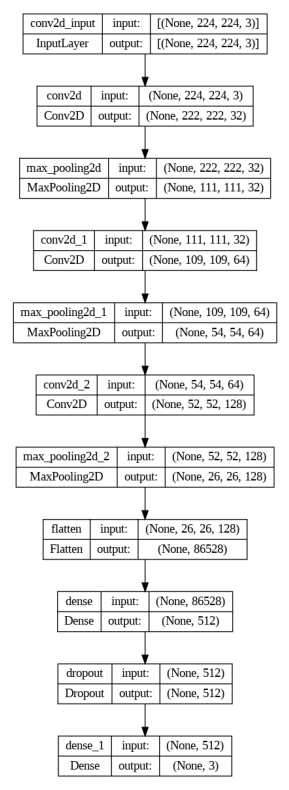

In [ ]:
# Plot the model architecture
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = plt.imread('model_plot.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical'
)

# Flow validation images in batches using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical'
)

# Flow test images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical'
)

Found 467 images belonging to 3 classes.
Found 156 images belonging to 3 classes.
Found 157 images belonging to 3 classes.


In [ ]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 32
epochs = 50

# Assuming train_generator and val_generator are instances of ImageDataGenerator
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint]
)

Epoch 1/50
14/14 [==============================] - ETA: 0s - loss: 0.9630 - accuracy: 0.5149
Epoch 1: val_loss improved from inf to 0.70090, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 27s 1s/step - loss: 0.9630 - accuracy: 0.5149 - val_loss: 0.7009 - val_accuracy: 0.5859
Epoch 2/50
14/14 [==============================] - ETA: 0s - loss: 0.6722 - accuracy: 0.6391
Epoch 2: val_loss improved from 0.70090 to 0.58771, saving model to model.h5
14/14 [==============================] - 11s 836ms/step - loss: 0.6722 - accuracy: 0.6391 - val_loss: 0.5877 - val_accuracy: 0.7344
Epoch 3/50
14/14 [==============================] - ETA: 0s - loss: 0.6022 - accuracy: 0.7471
Epoch 3: val_loss improved from 0.58771 to 0.48864, saving model to model.h5
14/14 [==============================] - 11s 769ms/step - loss: 0.6022 - accuracy: 0.7471 - val_loss: 0.4886 - val_accuracy: 0.8047
Epoch 4/50
14/14 [==============================] - ETA: 0s - loss: 0.5263 - accuracy: 0.7862
Epoch 4: val_loss improved from 0.48864 to 0.45661, saving model to model.h5
14/14 [==============================] - 13s 942ms/step - loss: 0.5263 - accuracy: 0.7862 - va

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', test_acc)
print('Test loss:',test_loss)

4/4 [==============================] - 0s 113ms/step - loss: 0.2229 - accuracy: 0.9297
Test accuracy: 0.9296875
Test loss: 0.22294709086418152


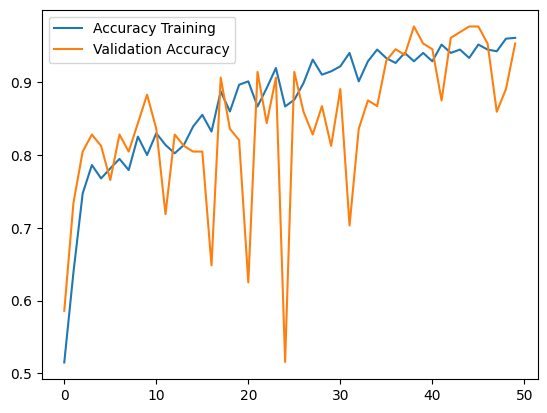

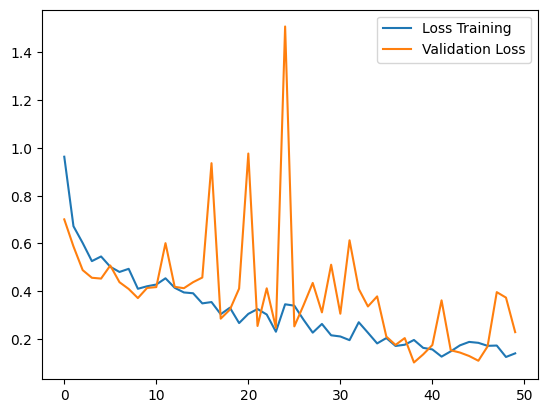

In [ ]:
plt.plot(history.history["accuracy"],label="Accuracy Training")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.legend()
plt.show()
print("\n")
plt.plot(history.history["loss"],label="Loss Training")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
import cv2
img_path = '/content/drive/MyDrive/Mask/benign/benign (14)_mask.png'
img = cv2.imread(img_path)
img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
img = img.astype('float32')
img /= 255

pred = model.predict(np.array([img]))[0]
class_idx = np.argmax(pred)

class_names_list = list(class_names)

print('Predicted class:', class_names_list[class_idx])

1/1 [==============================] - 0s 74ms/step
Predicted class: benign


In [ ]:
#predict
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred=model.predict(test_generator)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(test_generator.classes,y_pred,target_names=class_names))
print('Confusion Matrix : ')
print(confusion_matrix(test_generator.classes,y_pred))

5/5 [==============================] - 1s 106ms/step
              precision    recall  f1-score   support

      benign       0.60      0.56      0.58        88
   malignant       0.27      0.31      0.29        42
      normal       0.26      0.26      0.26        27

    accuracy                           0.44       157
   macro avg       0.38      0.38      0.37       157
weighted avg       0.45      0.44      0.45       157

Confusion Matrix : 
[[49 25 14]
 [23 13  6]
 [ 9 11  7]]


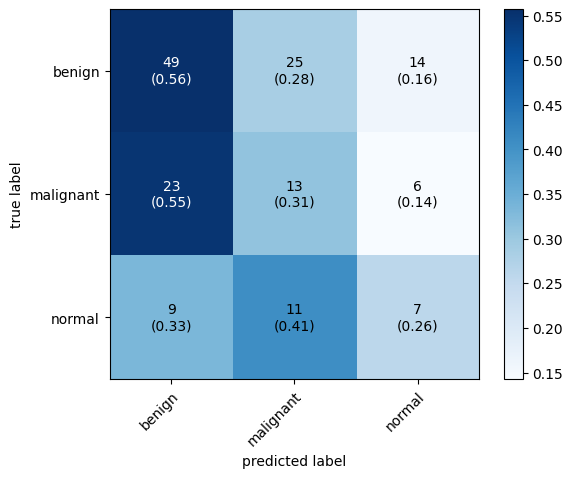

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Assuming you have already defined test_generator, y_pred, and class_names

# Calculate the confusion matrix
conf_mat = confusion_matrix(test_generator.classes, y_pred)

# Plot the confusion matrix
plot_confusion_matrix(conf_mat=conf_mat, show_absolute=True, show_normed=True, colorbar=True, class_names=class_names)
plt.show()
